# Efficient Frontier

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ind = pd.read_csv("../data/ind30_m_vw_rets.csv", index_col=0)/100

In [3]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [4]:
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period("M")

In [5]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [6]:
ind.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [7]:
ind.columns = ind.columns.str.strip()

In [8]:
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [4]:
%load_ext autoreload
%autoreload 2

In [7]:
import edhec_risk_kit as erk

In [8]:
ind = erk.get_ind_returns()

In [9]:
ind.head()

,food,beer,smoke,games,books,hshld,clths,hlth,chems,txtls,...,telcm,servs,buseq,paper,trans,whlsl,rtail,meals,fin,other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


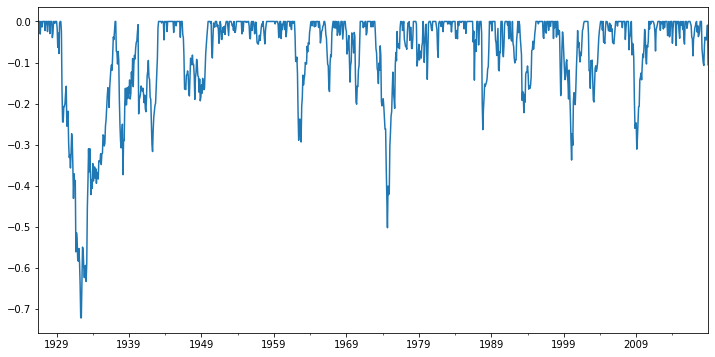

In [11]:
erk.drawdown_df(ind["food"])["drawdown"].plot.line(figsize=(12,6))

In [14]:
erk.var_gaussian(ind, modified=True).sort_values().tail()

carry    0.094527
meals    0.098403
buseq    0.099377
games    0.100701
mines    0.102782
dtype: float64

In [15]:
erk.var_gaussian(ind, modified=True).sort_values().head()

beer     0.033881
coal     0.047359
food     0.061207
telcm    0.064719
hshld    0.064886
dtype: float64

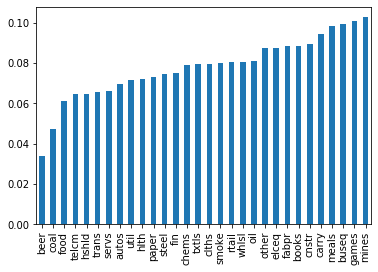

In [16]:
erk.var_gaussian(ind, modified=True).sort_values().plot.bar()

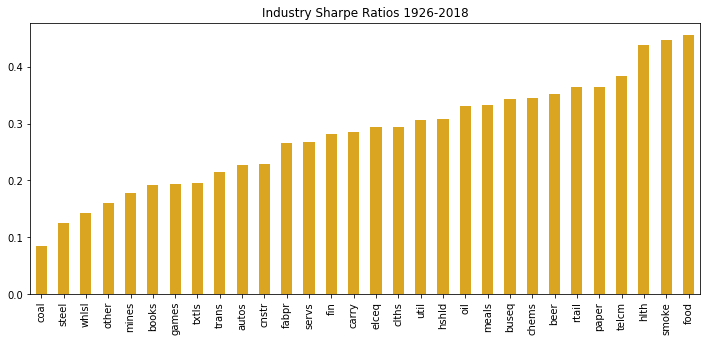

In [20]:
(erk.sharpe_ratio(ind, 0.03, 12)
     .sort_values()
     .plot.bar(title="Industry Sharpe Ratios 1926-2018",
               color="goldenrod",
               figsize=(12,5)))

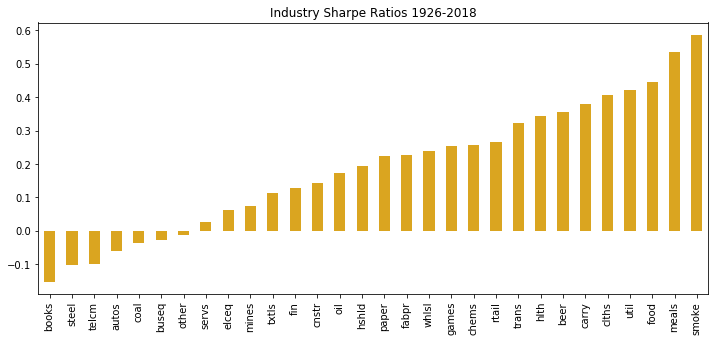

In [21]:
(erk.sharpe_ratio(ind["2000":], 0.03, 12)
     .sort_values()
     .plot.bar(title="Industry Sharpe Ratios 1926-2018",
               color="goldenrod",
               figsize=(12,5)))

We need two things to calculate the efficient frontier:
1. A set of expected returns: very hard to say. We'll work it as an in-sample excerccise (what **was** the efficient frontier)
2. Covariance matrix

In [22]:
er = erk.annualize_rets(ind["1995":"2000"], 12)

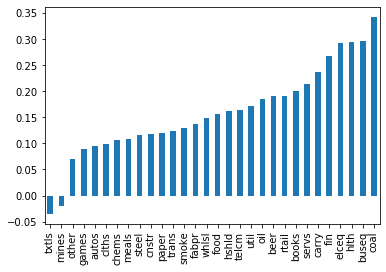

In [23]:
er.sort_values().plot.bar()

In [24]:
cov = ind["1995":"2000"].cov()

In [25]:
cov.shape

(30, 30)

Variance/Covariance

* variance accross the diagonal
* covariance with each asset

In [26]:
cov

,food,beer,smoke,games,books,hshld,clths,hlth,chems,txtls,...,telcm,servs,buseq,paper,trans,whlsl,rtail,meals,fin,other
food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,...,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,...,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,...,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,...,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,...,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283
hshld,0.001208,0.002447,0.000981,0.001018,0.000876,0.002849,0.001046,0.001253,0.001226,0.001172,...,0.000889,0.001111,0.000906,0.001594,0.001366,0.000578,0.001157,0.001076,0.001652,0.001322
clths,0.001474,0.001415,0.000761,0.001814,0.002037,0.001046,0.004896,0.000759,0.002547,0.002105,...,0.001263,0.001401,0.000746,0.002683,0.002466,0.001654,0.002607,0.002229,0.002699,0.001974
hlth,0.001105,0.001689,0.000877,0.001219,0.000657,0.001253,0.000759,0.002252,0.000444,0.000538,...,0.001093,0.001390,0.001264,0.000552,0.000880,0.000907,0.000770,0.000900,0.001412,0.001099
chems,0.001253,0.001292,0.000687,0.001547,0.001559,0.001226,0.002547,0.000444,0.002944,0.001705,...,0.000860,0.001072,0.000935,0.002581,0.001966,0.001257,0.001661,0.001425,0.002143,0.001832
txtls,0.001021,0.001721,0.000555,0.001291,0.001362,0.001172,0.002105,0.000538,0.001705,0.002882,...,0.000790,0.000582,0.000685,0.001869,0.001760,0.001426,0.001696,0.001126,0.001789,0.001668
